In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Rensking av datasett

In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str).str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# Gjør om price til float
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True).astype(float)

df2

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


## Deler in i subsets med varmerke

In [4]:

trademarked = {
    'Spider-Man',
    'Powerpuff Girls',
    'Minions',
    'Stranger Things',
    'Star Wars',
    'Marvel',
    'Disney',
    'Harry Potter',
    'Minecraft',
    'Jurassic World',
    'Batman',
    'DC',
    'Trolls World Tour',
    'Overwatch',
    'LEGO Frozen 2'
}

uncertain = {
    'Unikitty',
    'Minifigures',
    'THE LEGO MOVIE 2',
    'Speed Champions',
    'Juniors',
    'Creator Expert'
}

notrademark = {
    'Monkie Kid',
    'Friends',
    'City',
    'NINJAGO',
    'DUPLO',
    'Creator 3-in-1',
    'Hidden Side',
    'Ideas',
    'Classic',
    'Powered UP'
}

# verify that the groups are correct
# assert (trademarked | uncertain | notrademark) == set(df2['Theme'])

df_trademark   = df2[df2['Theme'].isin(trademarked)]
df_uncertain   = df2[df2['Theme'].isin(uncertain)]
df_notrademark = df2[df2['Theme'].isin(notrademark)]

df_trademark



,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
36,Resistance Y-wing Microfighter,Star Wars,86.0,9.99,40.0,1.0,44.0
46,Aurora's Royal Carriage,Disney,62.0,9.99,28.0,1.0,35.0
48,Moana's Ocean Adventure,Disney,46.0,9.99,36.0,1.0,39.0
49,The Taiga Adventure,Minecraft,74.0,9.99,40.0,2.0,48.0
...,...,...,...,...,...,...,...
1143,Hedwig,Harry Potter,630.0,39.99,148.0,1.0,166.0
1149,Attack on The Burrow,Harry Potter,1047.0,99.99,180.0,8.0,383.0
1160,Y-wing Starfighter,Star Wars,1967.0,199.99,220.0,2.0,359.0
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0


## 4.A) Pris beskrevet av antall brikker

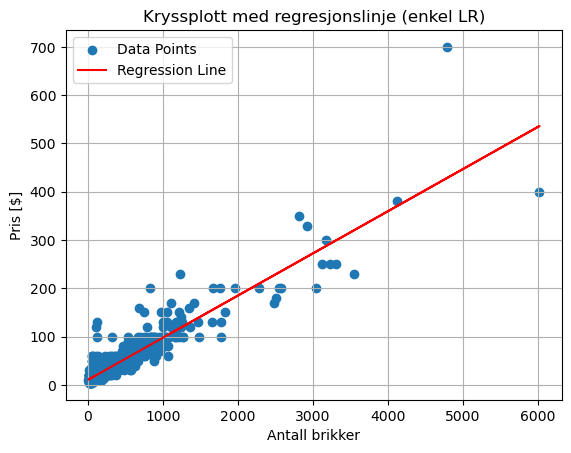

In [5]:
# enkel lineær regresjon
formel = 'Price ~ Pieces'

model4a = smf.ols(formel, data = df2)
resultat = model4a.fit()

#resultat.summary()

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

## 4.B) Pris beskrivet i antall brikker og forklaringsvariabel

### 4.B.1) Pris beskrevet i antall brikker og antall sider

In [6]:

# multippel lineær regresjon
# TODO: er kanskje meningen å bruke sample data som `data`, ikke df2
model4b1 = smf.ols('Price ~ Pieces + Pages' , data = df2)
result = model4b1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1970.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.11e-290
Time:                        15:37:18   Log-Likelihood:                -3183.1
No. Observations:                 714   AIC:                             6372.
Df Residuals:                     711   BIC:                             6386.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5142      1.250      5.210      0.000       4.059       8.969
Pieces         0.0780      0.002     32.271      0.000       0.073       0.083
Pages          0.0735      0.016      4.737      0.000       0.043       0.104
==============================================================================
Omnibus:                      746.640   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96426.614
Skew:                           4.487   Prob(JB):                         0.00
Kurtosis:                      59.220   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.B.2) Pris beskrevet i antall brikker og minifigures 

In [7]:

# multippel lineær regresjon
# TODO: er kanskje meningen å bruke sample data som `data`, ikke df2
model4b2 = smf.ols('Price ~ Pieces + Minifigures' , data = df2)

result = model4b2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1915.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          5.59e-287
Time:                        15:37:18   Log-Likelihood:                -3191.6
No. Observations:                 714   AIC:                             6389.
Df Residuals:                     711   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.3232      1.300      6.401      0.000       5.770      10.876
Pieces          0.0849      0.002     48.129      0.000       0.081       0.088
Minifigures     0.9006      0.400      2.250      0.025       0.115       1.686
==============================================================================
Omnibus:                      701.879   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84326.544
Skew:                           4.042   Prob(JB):                         0.00
Kurtosis:                      55.623   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.B.3) Pris beskrevet i antall brikker og Unique_Pieces

In [8]:

# multippel lineær regresjon
# TODO: er kanskje meningen å bruke sample data som `data`, ikke df2
model4b3 = smf.ols('Price ~ Pieces + Unique_Pieces' , data = df2)

result = model4b3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1917.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          3.82e-287
Time:                        15:37:18   Log-Likelihood:                -3191.3
No. Observations:                 714   AIC:                             6389.
Df Residuals:                     711   BIC:                             6402.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8058      1.407      5.547      0.000       5.043      10.568
Pieces            0.0814      0.003     28.604      0.000       0.076       0.087
Unique_Pieces     0.0338      0.014      2.414      0.016       0.006       0.061
==============================================================================
Omnibus:                      735.555   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88897.890
Skew:                           4.394   Prob(JB):                         0.00
Kurtosis:                      56.953   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.C.A) Pris beskrevet av antall brikker, per gruppe (3x LR)

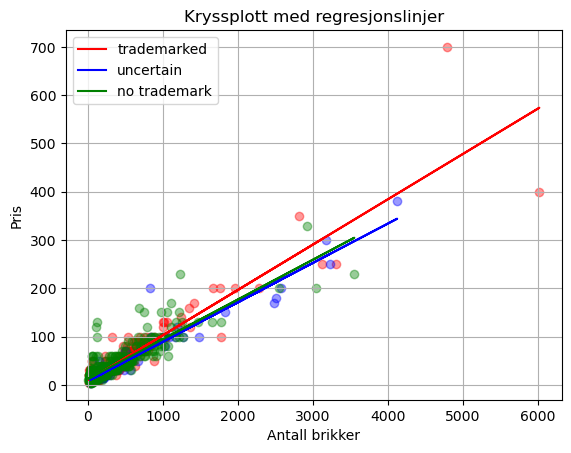

In [9]:

subsets = [
    {
        "data": df_trademark, 
        "name": "trademarked",
        "color" : "red"
    },
    {
        "data": df_uncertain,
        "name": "uncertain",
        "color": "blue"
    },
    {
        "data": df_notrademark,
        "name": "no trademark",
        "color": "green"
    }
]

for subset in subsets:
    data = subset['data']
    model3 = smf.ols('Price ~ Pieces + abc' , data = data)
    fit = model3.fit()
    
    slope = fit.params['Pieces']
    intercept = fit.params['Intercept']

    reg_x = np.array(data['Pieces'])
    reg_y = slope * reg_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(data['Pieces'], data['Price'], color=subset['color'], alpha=0.4)
    plt.plot(reg_x, reg_y, color=subset['color'], label=subset['name'])
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## Pris beskrevet av antall brikker